In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the given dataset 
carprice=pd.read_csv("CarPrice_Assignment.csv")
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Split the carname column 
carprice["CarName"]= carprice["CarName"].str.split(" ", n=1, expand=True) 

# We now rename the 'CarName' column to Company
carprice = carprice.rename({'CarName': 'Company'}, axis=1)
carprice.head()


,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Prints all the rows 
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)


# Check for duplicate values and change them, if any
carprice['Company'].replace(to_replace=["toyouta","toyota"],value="Toyota",inplace=True)
carprice['Company'].replace(to_replace=["vokswagen","volkswagen","vw"],value="Volkswagen ",inplace=True)
carprice['Company'].replace(to_replace=["nissan","nissan"],value="Nissan",inplace=True)
carprice['Company'].replace(to_replace=["maxda","mazda"],value="Mazda",inplace=True)
carprice['Company'].replace(to_replace=["porcshce","porsche"],value="Porsche",inplace=True)
print(carprice)

     car_ID  symboling      Company fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
5         6          2         audi      gas        std        two   
6         7          1         audi      gas        std       four   
7         8          1         audi      gas        std       four   
8         9          1         audi      gas      turbo       four   
9        10          0         audi      gas      turbo        two   
10       11          2          bmw      gas        std        two   
11       12          0          bmw      gas        std       four   
12       13          0          bmw      gas        std        two   
13       14         

### checking the various aspects of the carprice dataframe

In [5]:
carprice.shape

(205, 26)

In [6]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
Company             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#   Step 2: Visualising the Data

## Visualising Numeric Variables

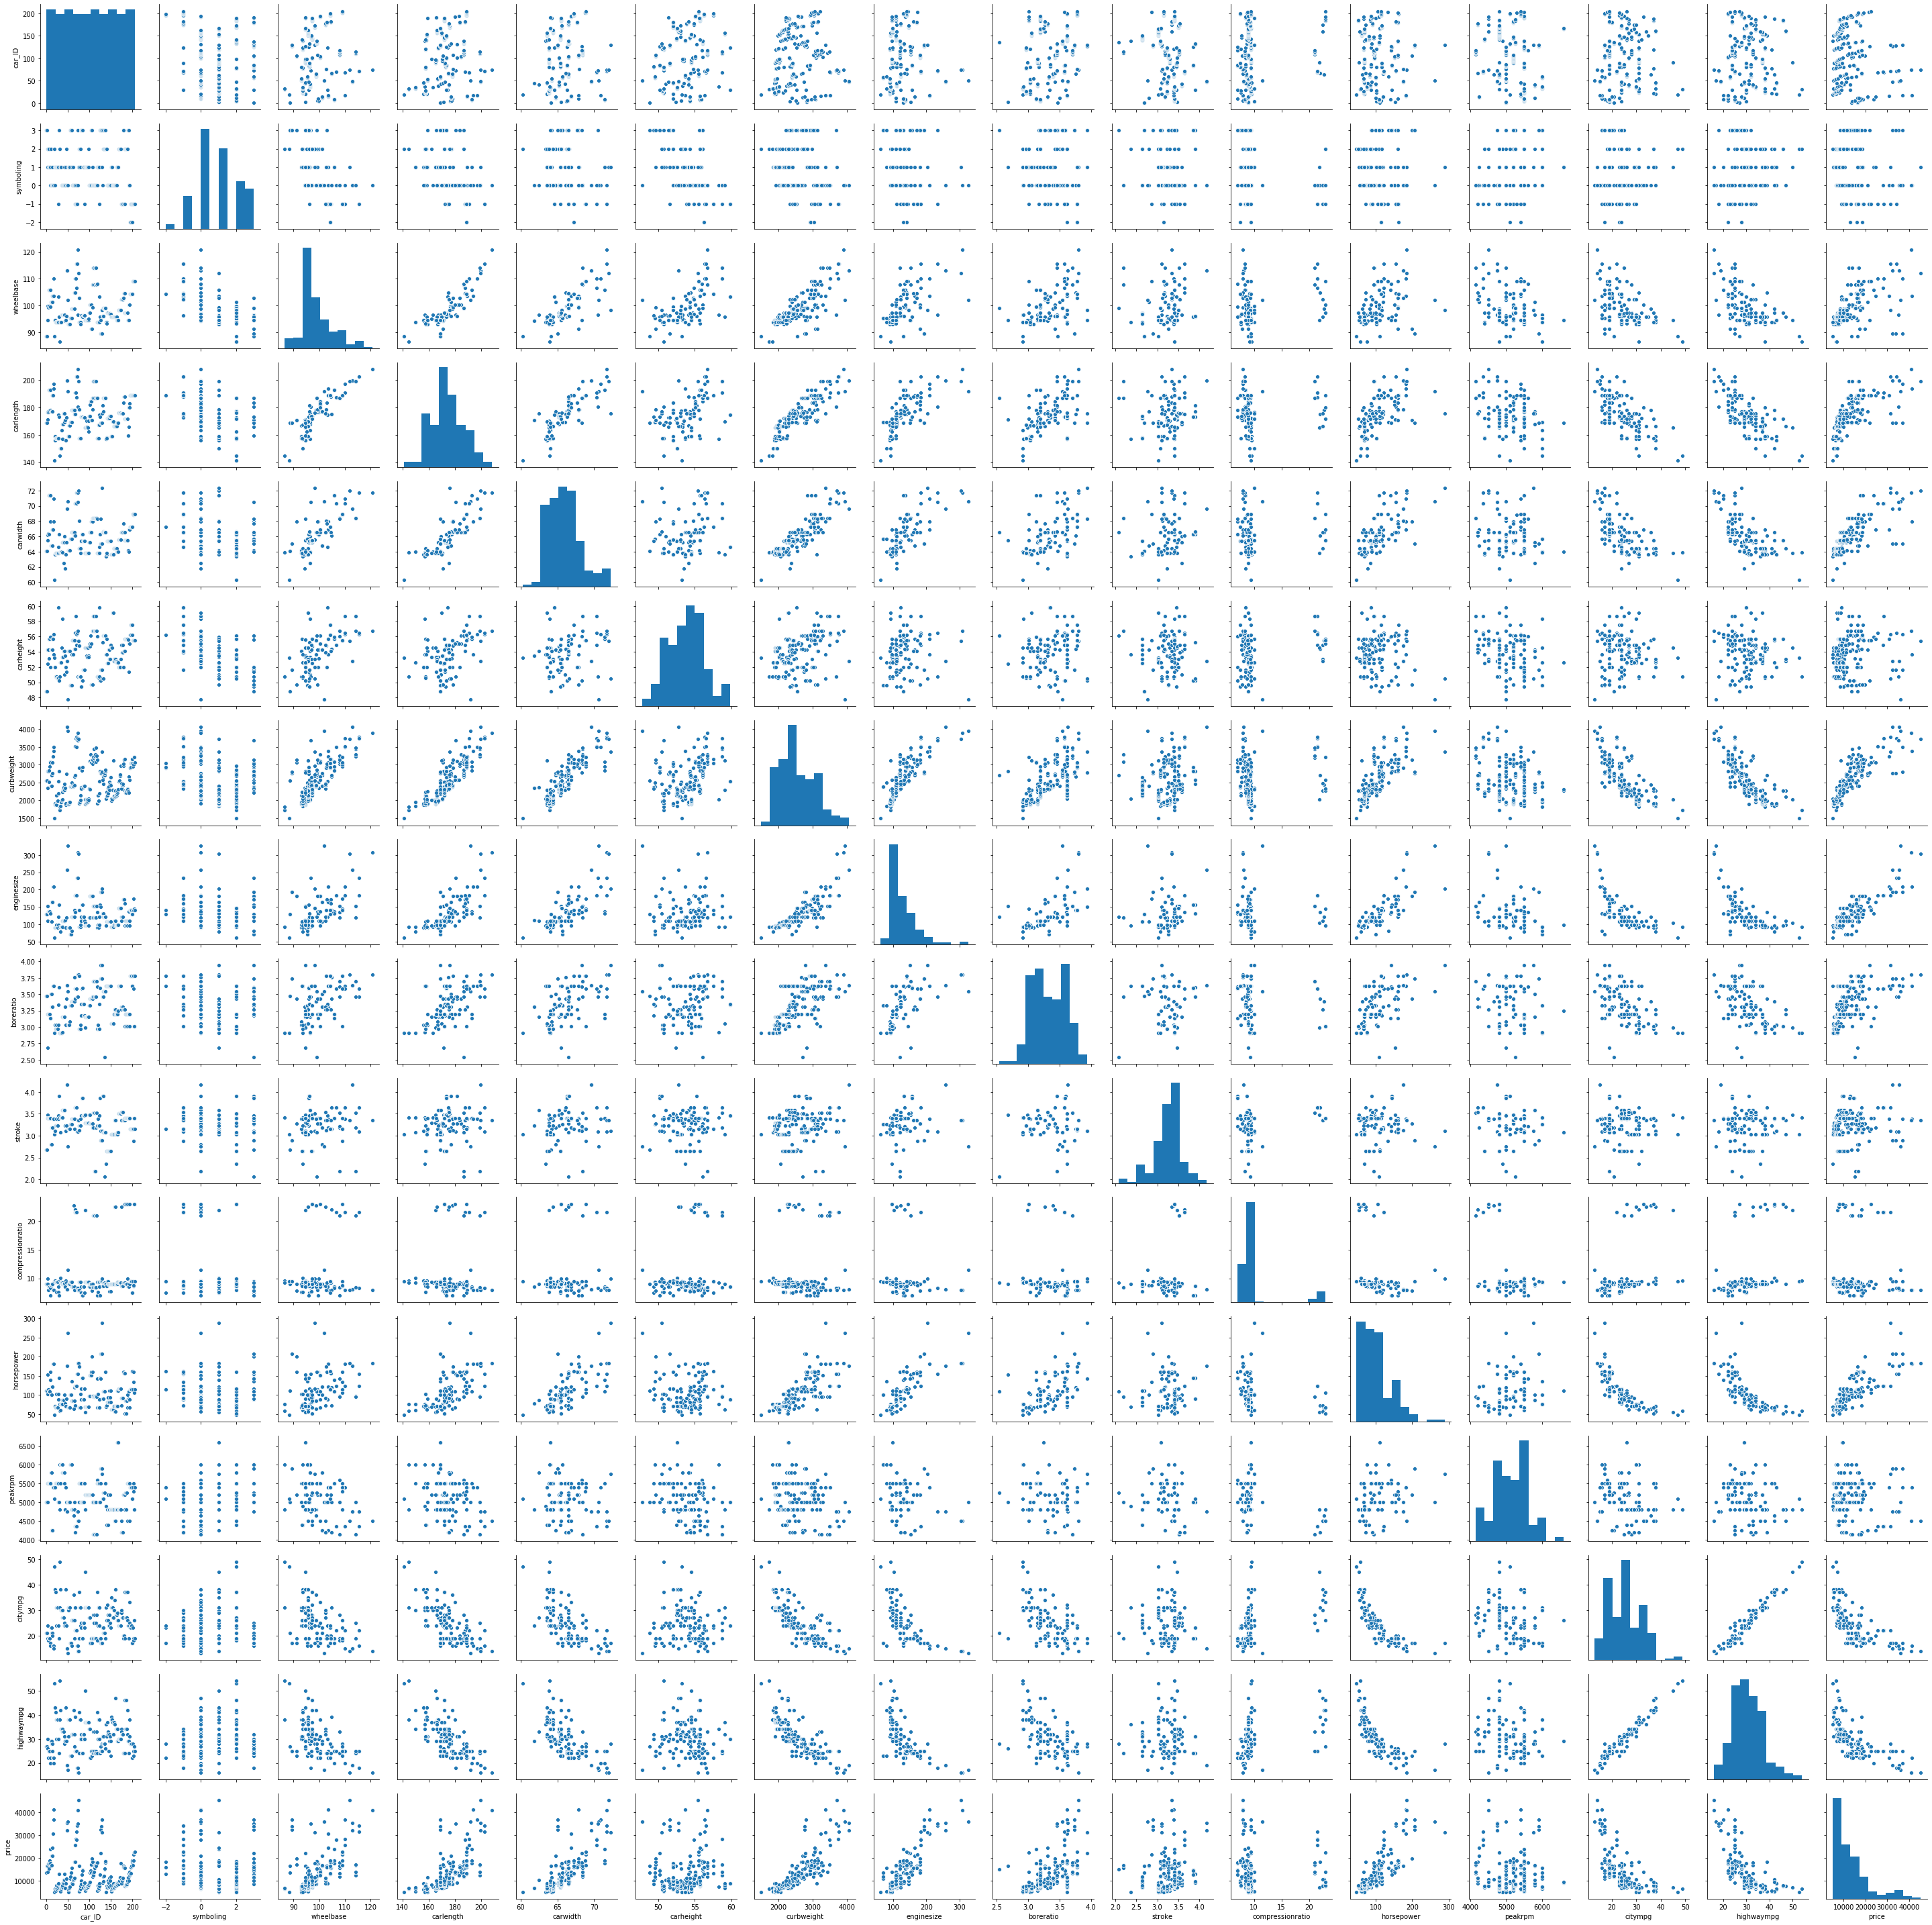

In [8]:
### Let's make a pairplot of all the numeric variables
sns.pairplot(carprice)
plt.show()


### by looking into the pair plots we find datapoints of engine size can give us a linear regression model.

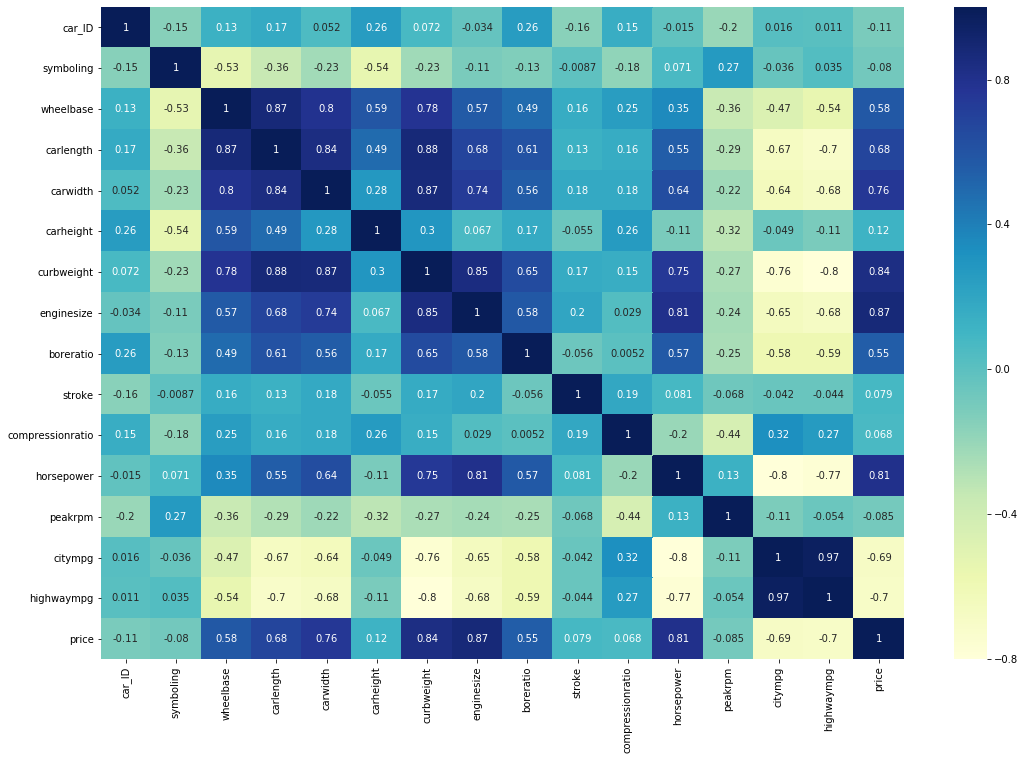

In [9]:
### Examine the correlation coefficients to determine highly correlated variables
plt.figure(figsize=(18,12))
sns.heatmap(carprice.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Visualising Categorical Variables

<Figure size 432x288 with 0 Axes>

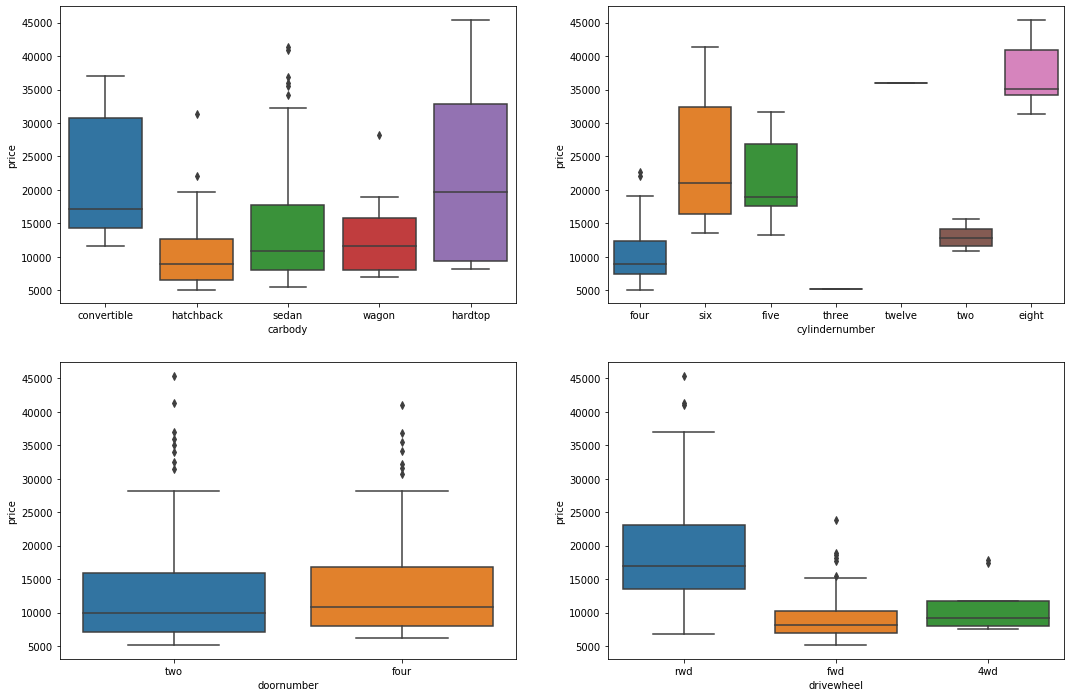

In [10]:
# Box plot with visible outliers 
fig = plt.figure()
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
sns.boxplot(x="carbody",y='price',data=carprice)

plt.subplot(2, 2, 2)
sns.boxplot(x='cylindernumber',y='price',data=carprice)

plt.subplot(2, 2, 3)
sns.boxplot(x="doornumber",y='price',data=carprice)

plt.subplot(2, 2, 4)
sns.boxplot(x="drivewheel",y='price',data=carprice)
plt.show()

### In the above plot we find that carbody has 5 types in which the hardtop model  has a widespread of plot compared to the other models,cylindernumber has  7 types in which six has a widesperead plot,doornumber has 2 types in which the mean of four is little bit high than two in this cylindernumber case and drivewheel has 3 types in which rwd has a widespread plot.  

<Figure size 432x288 with 0 Axes>

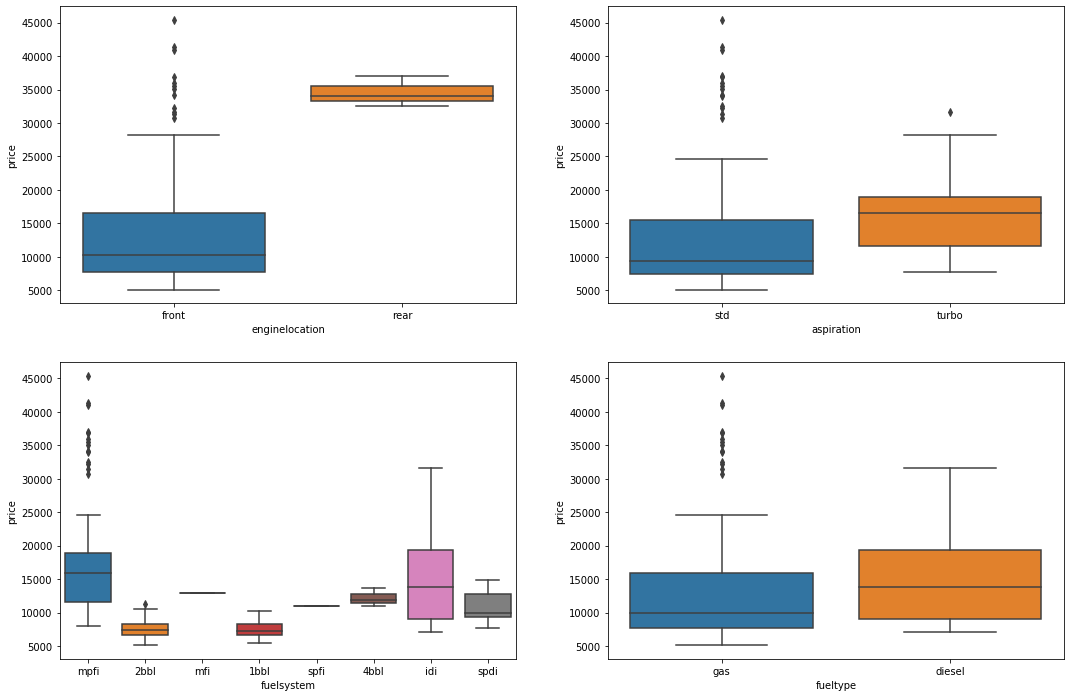

In [11]:
# Plot a box plot and show outliers 
fig = plt.figure()
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
sns.boxplot(x="enginelocation",y='price',data=carprice)

plt.subplot(2, 2, 2)
sns.boxplot(x="aspiration",y='price',data=carprice)

plt.subplot(2, 2, 3)
sns.boxplot(x="fuelsystem",y='price',data=carprice)

plt.subplot(2, 2, 4)
sns.boxplot(x="fueltype",y='price',data=carprice)

plt.show()

### In the above plot we find enginelocation 2 types are present in front has a widespread of plot and rear is too costly ,aspiration has two types in which turbo is little bit high ,fuelsystem has 8 types and fueltype has 2 types in which diseal has higher mean

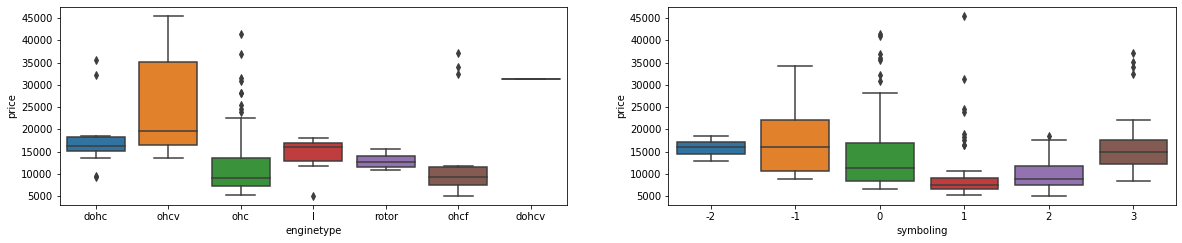

In [12]:
# ploting a box plot and showing the outliers 
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 1)
sns.boxplot(x="enginetype",y='price',data=carprice)

plt.subplot(2, 2, 2)
sns.boxplot(x="symboling",y='price',data=carprice)


### In the above plot we find enginetype in which 8 types are present and ohcv has a widespread plot and in symboling we have 6 types and -1 has a widespread data in the plot

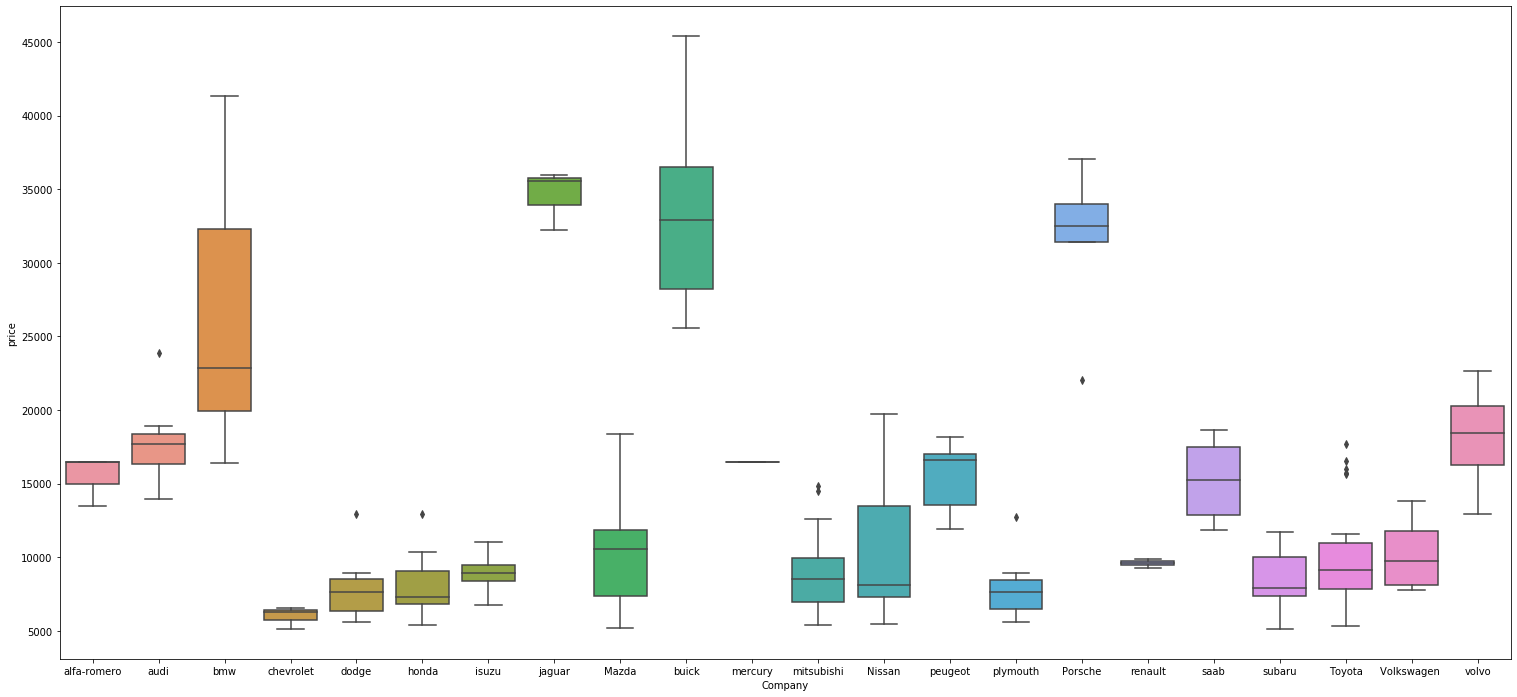

In [13]:
# ploting a box plot and showing the outliers 
plt.figure(figsize=(26,12))
sns.boxplot(x="Company",y='price',data=carprice)
plt.show()

### In the above plot we can see that bmw company has widespread plot compared to the other company brands and it is the most sold car 

# Step 3: Data Preparation

## Dummy Variables

In [14]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'dummy1'
# The variable enginetype has seven levels. We need to convert these levels into integer as well.

dummy1 = pd.get_dummies(carprice["enginetype"])

# Let's drop the first column from dummy1 df using 'drop_first = True'


dummy1 = pd.get_dummies(carprice["enginetype"], drop_first = True)

# Now let's see the head of our dataframe.

dummy1.head()



,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [15]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, dummy1], axis = 1)
carprice.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0


In [16]:
# Drop 'enginetype' as we have created the dummies for it

carprice.drop(['enginetype'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0


In [17]:
# Get the dummy variables for the feature 'company' and store it in a new variable - 'dummy2'


dummy2 = pd.get_dummies(carprice["Company"])

# Let's drop the first column from dummy2 df using 'drop_first = True'


dummy2 = pd.get_dummies(carprice["Company"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy2], axis = 1)

# Drop 'Company' as we have created the dummies for it


carprice.drop(["Company"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'dummy3'


dummy3 = pd.get_dummies(carprice["fueltype"])

# Let's drop the first column from dummy3 df using 'drop_first = True'


dummy3 = pd.get_dummies(carprice["fueltype"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy3], axis = 1)

# Drop 'fueltype' as we have created the dummies for it

carprice.drop(["fueltype"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas
0,1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'dummy4'


dummy4 = pd.get_dummies(carprice["aspiration"])

# Let's drop the first column from dummy4 df using 'drop_first = True'


dummy4 = pd.get_dummies(carprice["aspiration"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy4], axis = 1)

# Drop 'aspiration' as we have created the dummies for it

carprice.drop(["aspiration"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo
0,1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
# Get the dummy variables for the feature 'doornumber' and store it in a new variable - 'dummy5'


dummy5 = pd.get_dummies(carprice["doornumber"])

# Let's drop the first column from dummy5 df using 'drop_first = True'


dummy5 = pd.get_dummies(carprice["doornumber"], drop_first = True)

#changing the coloumn name .so that it dosent get mismatched with other variable like doornumber
dummy5 = dummy5.rename({'two': 'door_two'}, axis=1)


# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy5], axis = 1)

# Drop 'doornumbers' as we have created the dummies for it

carprice.drop(["doornumber"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()


,car_ID,symboling,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two
0,1,3,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,3,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,3,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,4,2,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'dummy6'


dummy6 = pd.get_dummies(carprice["carbody"])

# Let's drop the first column from dummy6 df using 'drop_first = True'


dummy6 = pd.get_dummies(carprice["carbody"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy6], axis = 1)

# Drop 'carbody' as we have created the dummies for it

carprice.drop(["carbody"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon
0,1,3,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,2,3,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,3,1,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,4,2,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,2,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [22]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'dummy7'


dummy7 = pd.get_dummies(carprice["drivewheel"])

# Let's drop the first column from dummy7 df using 'drop_first = True'


dummy7 = pd.get_dummies(carprice["drivewheel"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy7], axis = 1)

# Drop 'drivewheel' as we have created the dummies for it

carprice.drop(["drivewheel"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,2,3,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,3,1,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
3,4,2,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,5,2,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [23]:
# Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'dummy8'


dummy8 = pd.get_dummies(carprice["enginelocation"])

# Let's drop the first column from dummy8 df using 'drop_first = True'


dummy8 = pd.get_dummies(carprice["enginelocation"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy8], axis = 1)

# Drop 'enginelocation' as we have created the dummies for it

carprice.drop(["enginelocation"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear
0,1,3,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,2,3,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,3,1,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
3,4,2,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [24]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'dummy9'


dummy9 = pd.get_dummies(carprice["cylindernumber"])

# Let's drop the first column from dummy9 df using 'drop_first = True'


dummy9 = pd.get_dummies(carprice["cylindernumber"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy9], axis = 1)

# Drop 'cylindernumber' as we have created the dummies for it

carprice.drop(["cylindernumber"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two
0,1,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [25]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'dummy10'


dummy10 = pd.get_dummies(carprice["fuelsystem"])

# Let's drop the first column from dummy10 df using 'drop_first = True'


dummy10 = pd.get_dummies(carprice["fuelsystem"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy10], axis = 1)

# Drop 'fuelsystem' as we have created the dummies for it

carprice.drop(["fuelsystem"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Get the dummy variables for the feature 'symboling' and store it in a new variable - 'dummy11'


dummy11 = pd.get_dummies(carprice["symboling"])

# Let's drop the first column from dummy11 df using 'drop_first = True'


dummy11 = pd.get_dummies(carprice["symboling"], drop_first = True)

# Add the results to the original carprice dataframe


carprice = pd.concat([carprice, dummy11], axis = 1)

# Drop 'fuelsystem' as we have created the dummies for it

carprice.drop(["symboling"], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

carprice.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [27]:
# droping the car id colomn
carprice.drop(["car_ID"], axis = 1, inplace = True)
carprice.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Step 4: Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)
nums=['carheight','carlength','carwidth','citympg','compressionratio','curbweight','enginesize','highwaympg','horsepower','peakrpm','stroke','wheelbase','price','boreratio']
df_train[nums]

(143, 69)
(62, 69)


,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,stroke,wheelbase,price,boreratio
122,50.8,167.3,63.8,31,9.40,2191,98,38,68,5500,3.230,93.7,7609.000,2.97
125,50.2,168.9,68.3,19,9.50,2778,151,27,143,5500,3.110,94.5,22018.000,3.94
166,52.6,168.7,64.0,26,9.40,2300,98,29,112,6600,3.080,94.5,9538.000,3.24
1,48.8,168.8,64.1,21,9.00,2548,130,27,111,5000,2.680,88.6,16500.000,3.47
199,57.5,188.8,67.2,17,7.50,3157,130,22,162,5100,3.150,104.3,18950.000,3.62
190,51.4,165.7,64.0,24,8.50,2221,109,29,90,5500,3.400,94.5,9980.000,3.19
96,54.5,165.3,63.8,31,9.40,1971,97,37,69,5200,3.290,94.5,7499.000,3.15
177,53.9,175.6,66.5,27,8.70,2458,122,32,92,4200,3.540,102.4,11248.000,3.31
181,54.1,187.8,66.5,19,9.20,3151,161,24,156,5200,3.350,104.5,15750.000,3.27
97,53.5,170.2,63.8,31,9.40,2037,97,37,69,5200,3.290,94.5,7999.000,3.15


In [29]:
# as standard thumb rule we will prefer to go for min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Apply scaler() to all the columns except the  'dummy' variables


df_train[nums] = scaler.fit_transform(df_train[nums])
#df_train[nums]

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [31]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.097902,0.020979,0.139860,0.048951,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.0,0.062937,0.055944,0.027972,0.013986,0.020979,0.076923,0.041958,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.298227,0.143818,0.348061,0.216524,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.0,0.243703,0.230621,0.165472,0.117845,0.143818,0.267406,0.201198,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('price')
X_train = df_train


# Step 5: Building a linear model

## RFE
### Recursive feature elimination

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 10
lm_1 = LinearRegression()
lm_1.fit(X_train, y_train)

rfe_1 = RFE(lm_1, 10)             # running RFE
rfe_1 = rfe_1.fit(X_train, y_train)

In [35]:
### giving ranking based on the corelation with help of RFE feature
list(zip(X_train.columns,rfe_1.support_,rfe_1.ranking_))

[('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 35),
 ('highwaympg', False, 26),
 ('dohcv', False, 12),
 ('l', False, 7),
 ('ohc', False, 51),
 ('ohcf', False, 10),
 ('ohcv', False, 42),
 ('rotor', True, 1),
 ('Nissan', False, 55),
 ('Porsche', True, 1),
 ('Toyota', False, 49),
 ('Volkswagen ', False, 56),
 ('alfa-romero', False, 40),
 ('audi', False, 36),
 ('bmw', True, 1),
 ('buick', False, 44),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 48),
 ('jaguar', False, 27),
 ('mercury', False, 57),
 ('mitsubishi', False, 13),
 ('peugeot', False, 6),
 ('plymouth', False, 19),
 ('renault', False, 38),
 ('saab', False, 9),
 ('subaru', False, 11),
 ('volvo', False, 8),
 ('gas', False, 29),

In [36]:
### which have good releation and assigning them to col
col = X_train.columns[rfe_1.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rotor', 'Porsche',
       'bmw', 'rear', 'three', 'twelve'],
      dtype='object')

In [37]:
### removing unwanted coloumns
X_train.columns[~rfe_1.support_]

Index([       'wheelbase',        'carlength',        'carheight',
                 'stroke', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',           'Nissan',
                 'Toyota',      'Volkswagen ',      'alfa-romero',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',          'mercury',       'mitsubishi',
                'peugeot',         'plymouth',          'renault',
                   'saab',           'subaru',            'volvo',
                    'gas',            'turbo',         'door_two',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'fwd',              'rwd',
                   'five',             'four',              's

## Building model using statsmodel, for the detailed statistics

In [38]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [41]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.21e-64
Time:                        19:05:01   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1594      0.019     -8.597      0.0

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.19
2,curbweight,9.26
3,enginesize,7.23
1,carwidth,4.92
4,boreratio,1.85
6,Porsche,1.82
8,rear,1.66
10,twelve,1.49
5,rotor,1.24
7,bmw,1.13


In [44]:
# Dropping  insignificant variables,which have high p-value

X = X_train_rfe.drop('twelve', 1,)

In [45]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.18e-65
Time:                        19:05:02   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1587      0.018     -8.591      0.0

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.15
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
6,Porsche,1.80
8,rear,1.65
5,rotor,1.17
7,bmw,1.09
9,three,1.05


In [48]:
# Dropping highly correlated variable which have high VIF value

X = X_train_lm.drop('curbweight', 1,)

In [49]:
# Build a third fitted model
X_train_lm1 = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm1).fit()

In [50]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.01e-63
Time:                        19:05:02   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1778      0.019     -9.421      0.0

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
5,Porsche,1.67
7,rear,1.64
4,rotor,1.14
6,bmw,1.09
8,three,1.05


In [52]:
# Dropping  insignificant variable which have high p-value

X = X_train_lm1.drop('boreratio', 1,)

In [53]:
# Build a four fitted model
X_train_lm2 = sm.add_constant(X)

lr_4= sm.OLS(y_train, X_train_lm2).fit()

In [54]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.04e-64
Time:                        19:05:03   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1925      0.017    -11.273      0.0

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.41
2,enginesize,3.02
1,carwidth,2.86
6,rear,1.64
4,Porsche,1.59
3,rotor,1.13
5,bmw,1.09
7,three,1.05


In [56]:
# Dropping  insignificant variable which have high p-value

X = X_train_lm2.drop('Porsche', 1,)

In [57]:
# Build a fith fitted model
X_train_lm3 = sm.add_constant(X)

lr_5= sm.OLS(y_train, X_train_lm3).fit()

In [58]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.62e-64
Time:                        19:05:03   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1976      0.017    -11.724      0.0

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.11
2,enginesize,3.02
1,carwidth,2.75
3,rotor,1.12
4,bmw,1.09
5,rear,1.08
6,three,1.05


In [60]:
# Dropping  insignificant variable which has high p-value

X = X_train_lm3.drop('three', 1,)

In [61]:
# Build a sixth fitted model
X_train_lm4 = sm.add_constant(X)

lr_6= sm.OLS(y_train, X_train_lm4).fit()

In [62]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.81e-64
Time:                        19:05:04   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1870      0.017    -11.143      0.0

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4.values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.67
2,enginesize,3.01
1,carwidth,2.68
3,rotor,1.12
4,bmw,1.09
5,rear,1.08


# Step 6: Residual Analysis of the train data

In [64]:
y_train_price = lr_6.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

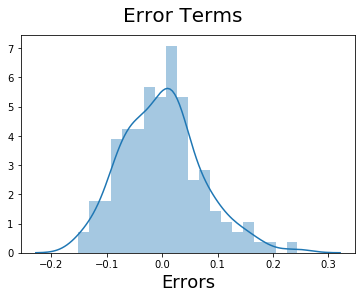

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

# Step 7: Making Predictions Using the Final Model

In [66]:
# Applying the scaling on the test sets
nums=['carheight','carlength','carwidth','citympg','compressionratio','curbweight','enginesize','highwaympg','horsepower','peakrpm','stroke','wheelbase','price','boreratio']
df_test[nums]

df_test[nums] = scaler.transform(df_test[nums])

In [67]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,Nissan,Porsche,Toyota,Volkswagen,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mercury,mitsubishi,peugeot,plymouth,renault,saab,subaru,volvo,gas,turbo,door_two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,-1,0,1,2,3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.064516,0.032258,0.193548,0.080645,0.0,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.016129,0.064516,0.048387,0.048387,0.0,0.048387,0.016129,0.080645,0.887097,0.177419,0.435484,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.032258,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.247676,0.178127,0.398304,0.274512,0.0,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.127000,0.247676,0.216335,0.216335,0.0,0.216335,0.127000,0.274512,0.319058,0.385142,0.499868,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.178127,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,

In [68]:
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [69]:
# Now let's use our model to make predictions.
X_test_carnew1=X_train_lm4.drop(['const'],axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_carnew = X_test[X_test_carnew1.columns]

# Adding a constant variable 
X_test_carnew = sm.add_constant(X_test_carnew)

In [70]:
# Making predictions
y_pred = lr_6.predict(X_test_carnew)

## Model Evaluation

Text(0, 0.5, 'y_pred')

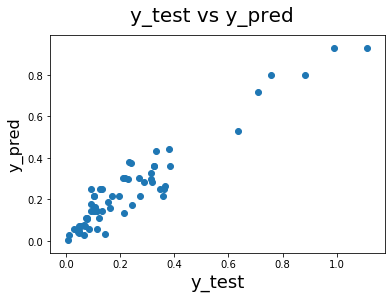

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## We can see that the equation of our best fitted line is:
$ price = 0.73  \times  enginesize + 0.47  \times  carwidth + 0.44 \times rear + 0.25 \times bmw + 0.16 \times rotor-0.1870  $

### the significant variables that predict the car price are
1) enginesize
2) carwidth
3) rear
4) bmw
5) rotor


In [72]:
# calculate the R-squared score on the test set.score on the test set.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9004517106020921

## the R-squared value for the test data set is 0.900 and for train data set is 0.891